# Jonathan Halverson
# Friday, February 24, 2017
# Part 6: When fights are finished

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('halverson')
%matplotlib inline

In [18]:
iofile = 'data/fightmetric_cards/fightmetric_fights_CLEAN_3-6-2017.csv'
fights = pd.read_csv(iofile, header=0, parse_dates=['Date'])
iofile = 'data/fightmetric_fighters_with_corrections_from_UFC_Wikipedia_CLEAN.csv'
fighters = pd.read_csv(iofile, header=0, parse_dates=['Dob'])
fighters['Age'] = (pd.to_datetime('today') - fighters.Dob) / np.timedelta64(1, 'Y')
cols = ['Name', 'Height', 'Reach', 'LegReach', 'Stance', 'Dob', 'Age']
df = fights.merge(fighters[cols], how='left', left_on='Winner', right_on='Name')
df = df.merge(fighters[cols], how='left', left_on='Loser', right_on='Name', suffixes=('', '_L'))
df.head(3)

,Winner,Outcome,Loser,WeightClass,Method,MethodNotes,Round,Time,Event,Date,...,Stance,Dob,Age,Name_L,Height_L,Reach_L,LegReach_L,Stance_L,Dob_L,Age_L
0,Germaine de Randamie,def.,Holly Holm,Women's Featherweight,U-DEC,NaN,5,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,...,Orthodox,1984-04-24,32.904166,Holly Holm,68.0,69.0,38.0,Southpaw,1981-10-17,35.423041
1,Anderson Silva,def.,Derek Brunson,Middleweight,U-DEC,NaN,3,5:00,UFC 208: Holm vs. De Randamie,2017-02-11,...,Southpaw,1975-04-14,41.933784,Derek Brunson,73.0,77.0,43.0,Southpaw,1984-01-04,33.208074
2,Jacare Souza,def.,Tim Boetsch,Middleweight,SUB,Kimura,1,3:41,UFC 208: Holm vs. De Randamie,2017-02-11,...,Orthodox,1979-12-07,37.284818,Tim Boetsch,72.0,74.0,42.0,Orthodox,1981-01-28,36.140372


### Let's consider a subset of the data:

In [19]:
cols = ['Winner', 'Loser', 'Method', 'Round', 'Time', 'Date']
finishes = df[df.Method.isin(['KO/TKO', 'SUB']) & (df.Date > np.datetime64('2005-01-01'))][cols]
finishes.head(5)

,Winner,Loser,Method,Round,Time,Date
2,Jacare Souza,Tim Boetsch,SUB,1,3:41,2017-02-11
10,Chan Sung Jung,Dennis Bermudez,KO/TKO,1,2:49,2017-02-04
12,James Vick,Abel Trujillo,SUB,3,0:49,2017-02-04
14,Marcel Fortuna,Anthony Hamilton,KO/TKO,1,3:10,2017-02-04
16,Curtis Blaydes,Adam Milstead,KO/TKO,2,0:59,2017-02-04


### How many fights are in the subset?

In [20]:
finishes.shape[0]

1935

### Was is the breakdown by round?

In [21]:
method_round = pd.crosstab(index=finishes.Method, columns=finishes.Round, margins=False)
method_round

Round,1,2,3,4,5
Method,,,,,
KO/TKO,661,350,156,11,6
SUB,372,242,123,8,6


In [22]:
method_round / method_round.sum(axis=0)

Round,1,2,3,4,5
Method,,,,,
KO/TKO,0.639884,0.591216,0.55914,0.578947,0.5
SUB,0.360116,0.408784,0.44086,0.421053,0.5


Note that the previous table implies that there have only been 12 finishes in the 5th round since 2005. Let's look at these fights:

### What is the proportion of each finishing method for each round?

In [34]:
tko = finishes[finishes.Method == 'KO/TKO'].Round.value_counts()
sub = finishes[finishes.Method == 'SUB'].Round.value_counts()
tko_p = 100.0 * tko / (tko + sub)
sub_p = 100.0 * sub / (tko + sub)

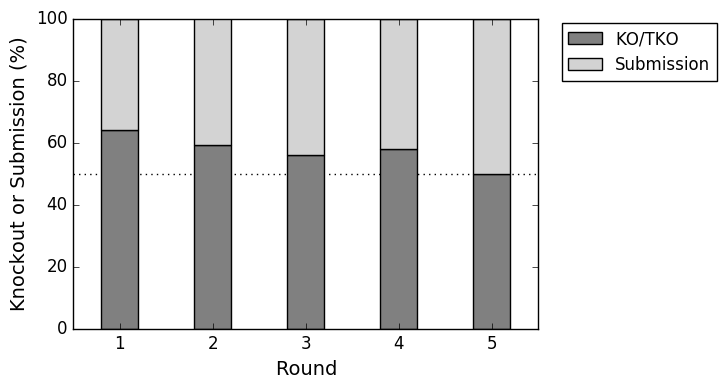

In [40]:
plt.plot([-0.5, 4.5], [50, 50], 'k:', zorder=0)
plt.bar(range(5), tko_p, width=0.4, color='gray', tick_label=[1, 2, 3, 4, 5], align='center', label='KO/TKO')
plt.bar(range(5), sub_p, width=0.4, color='lightgray', bottom=tko_p, align='center', label='Submission')
plt.xlim(-0.5, 4.5)
plt.legend(loc=(1.05, 0.8), fontsize=12)
plt.xlabel('Round')
plt.ylabel('Knockout or Submission (%)')
plt.savefig('report/finishes/tko_sub_by_round.pdf', bbox_inches='tight')

Are the result statistically significant?

In [39]:
from scipy.stats import chi2_contingency

chi_sq, p_value, dof, expect = chi2_contingency(method_round)
chi_sq, p_value, dof, p_value > 0.05

(8.4626907347192031, 0.076026228837602738, 4, True)

### What are the latest finishes in UFC history?

In [33]:
fifth_finish = df[df.Method.isin(['KO/TKO', 'SUB']) & (df.Round == 5)].reset_index(drop=True)
fifth_finish = fifth_finish[['Winner', 'Loser', 'Method', 'Round', 'Time', 'Event','Date']]
fifth_finish.index = range(1, 14)
fifth_finish.to_latex('report/finishes/late_finishes_RAW.tex')
fifth_finish

,Winner,Loser,Method,Round,Time,Event,Date
1,Miesha Tate,Holly Holm,SUB,5,3:30,UFC 196: McGregor vs Diaz,2016-03-05
2,Rose Namajunas,Paige VanZant,SUB,5,2:25,UFC Fight Night: Namajunas vs. VanZant,2015-12-10
3,Robbie Lawler,Rory MacDonald,KO/TKO,5,1:00,UFC 189: Mendes vs McGregor,2015-07-11
4,Stipe Miocic,Mark Hunt,KO/TKO,5,2:47,UFC Fight Night: Miocic vs Hunt,2015-05-09
5,Demetrious Johnson,Kyoji Horiguchi,SUB,5,4:59,UFC 186: Johnson vs Horiguchi,2015-04-25
6,Frankie Edgar,Cub Swanson,SUB,5,4:56,UFC Fight Night: Edgar vs Swanson,2014-11-22
7,TJ Dillashaw,Joe Soto,KO/TKO,5,2:20,UFC 177: Dillashaw vs Soto,2014-08-30
8,TJ Dillashaw,Renan Barao,KO/TKO,5,2:26,UFC 173: Barao vs Dillashaw,2014-05-24
9,Cain Velasquez,Junior Dos Santos,KO/TKO,5,3:09,UFC 166: Velasquez vs Dos Santos 3,2013-10-19
10,Demetrious Johnson,John Moraga,SUB,5,3:43,UFC on Fox: Johnson vs Moraga,2013-07-27


We see that the null hypotheis should be not be rejected in favor of the alternative. There is not enough evidence to conclude that there is a decreasing trend with round number.